In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm as LN
from astropy.table import Table,vstack,unique
from glob import glob
from makeic import makeLSMC
import pynbody as pb

In [5]:
flist = glob('gatables14/t*')
flist.sort()
t1 = Table()
for file in flist:
    t = Table.read(file,format='ascii')
    t1 = vstack([t1,t])
t1.sort(['fit','run'])
t1['mass'] = 1.83e11/(t1['mass']*2.12e10)
t1

run,r,d,v,beta,delta,gamma,theta,phi,mass,xdist,vdist,fit,distfit,mapfit,pmmlfit,pmmbfit,rvfit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20174.0,53.662798170170234,39.342142025745595,36.74445282874544,101.04626997839115,87.85673547033758,299.9869791992441,107.32865258582136,198.4775935766848,7.184923215813218,1.0057734283530884,27.56548780287456,0.01910283558801529,760.8676979996073,0.0813777656331474,6583.922104046886,4148.763725168569,951.8178308972203
20240.0,53.59301091861766,39.38774706036817,36.7039179442445,100.81247379370447,87.70001816293373,300.2886241617989,61.3337668276025,195.90448076513098,7.529856619708394,1.222081783333553,26.741628377084037,0.020377018877608295,716.608172143222,0.0771704312555345,4464.990401229154,2949.40313183976,815.2392483378225
20237.0,53.70155006349341,39.300950355092915,36.453187055580386,100.64128785411788,87.69328930567893,300.0309440210336,73.59796435006322,202.5101571444999,7.505637295556917,1.0037624163216863,26.50367983570983,0.020642488893407644,703.4525838222316,0.07149623443981763,6735.255566511963,4305.217979193904,847.2685064540591
20277.0,53.74595989310731,39.11322264649376,36.72638565616046,100.71575595553695,87.68870254055204,300.1413471704374,101.30896365204882,178.3133597277528,7.597598489157135,0.9403192287269587,25.900974980990913,0.021546711023462926,671.7447052178309,0.08306284105293536,7384.248494733622,3685.26570201943,869.3735730312527
20165.0,53.745129995654004,39.181904837099495,36.726164284386435,100.45485955559992,88.0019860195599,300.27730841535896,102.37898772918047,173.755417557513,7.482011668534981,0.9434507876524683,25.7759071861407,0.02173257821468006,665.2874906572619,0.08178051792422364,7660.81248132355,3578.1726455033245,927.6349790566564
20202.0,53.59733851876555,39.35262888700134,36.60577789058437,100.8927405628738,87.99458448128267,300.2697222878527,97.25236967554761,188.18344814156376,7.569821003180868,0.9551411860360703,25.02772498182297,0.02306304481059641,627.299312451028,0.08548294721111382,6669.602289282192,3449.0515923139515,799.6624260638599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19987.0,53.700260828820284,39.12634100881194,36.83910443915817,100.81507580351133,87.70807091919656,300.11794138154636,176.2358575831914,213.91370321988185,8.632075471698114,1.1265994842405804,1.5305459226571614,0.7644486120743236,3.611797219253603,0.06907971662635583,4560.036684374554,3100.960247306162,346.9880480960445
19897.0,53.700260828820284,39.12634100881194,36.83910443915817,100.81507580351133,87.70807091919656,300.11794138154636,176.2358575831914,213.91370321988185,8.632075471698114,1.1238804374268607,1.3985178782215728,0.7725938660563813,3.2189594933361616,0.06881156479872605,4608.86435958397,3172.5687529358415,359.2796795999353


In [6]:
t2 = unique(t1,keys=['r','d','v','beta','delta','theta','phi'],keep='last')
t2.sort('mapfit')
#t2.reverse()
t3 = t2[:20]
t2

run,r,d,v,beta,delta,gamma,theta,phi,mass,xdist,vdist,fit,distfit,mapfit,pmmlfit,pmmbfit,rvfit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20092.0,53.78942836772036,39.30760411596484,36.70036607186006,100.72668409104911,87.80475480531653,300.0447622513575,55.93959990638689,160.3248561743632,7.59308685260947,1.2522488237473182,19.000207352864756,0.03889353040945062,362.57600656843243,0.047893856033343334,7808.9604560438875,2267.0616317976937,1218.142274256472
20133.0,53.81041670874821,39.33306052651742,36.95886138082237,100.67076383222803,87.9052561383915,299.9818492136913,57.55791562135154,159.1505834826121,7.302803107102871,1.2732978023965205,21.667997348147274,0.03035841494718792,471.1233963729052,0.048874978082014485,7493.50404221961,2371.7698862354573,1228.2144435699531
20234.0,53.462423709128934,39.209393119876594,36.69220731880286,100.64678111107511,87.9451581190903,300.1565556977114,50.725107981176045,150.9143298592428,7.452598846474745,1.4069909731260106,21.325515237352864,0.031309328167133554,456.7572237370273,0.04925296270752974,7033.521659692107,2816.345991869677,1143.180555767331
20038.0,53.68606380195197,39.27064198308723,36.50362511671374,100.78852043148517,87.88554257319909,299.9695289502739,47.69692830139881,157.5047439829394,7.283462591700502,1.3219314495708514,22.729183880776127,0.02779151813275071,518.3633026434978,0.04963802185485845,6516.029857173044,2399.937483284362,1143.7196302296773
20285.0,53.96514832068657,39.18321922162189,36.53684868053814,101.01236763936573,87.96472690063923,300.11123902634597,53.41066517743925,163.2039017627049,8.24602154007655,1.2884039703302324,15.040975103093873,0.059624881166878654,227.89091684265244,0.052159373342939325,8832.691631225422,2115.597111352103,1100.7406598571622
20250.0,53.985329811048835,39.52132089063495,36.82293491729227,100.45316498697262,87.86997822973305,300.1469866191516,47.71601433650976,174.0822932745053,8.025960242184476,1.2791669899896285,15.933481523589256,0.054110011856482065,255.51210165083933,0.05313242252561029,7311.253972409819,1645.664172427159,1123.173818353953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20014.0,53.85983296650975,39.2587443025237,36.775476790321605,100.62594441516336,87.92486674229151,300.2532670770397,136.82153143583807,164.3094248124484,8.138018829033511,1.3187224159166426,18.251471862517402,0.04223049389493593,334.8552539585055,0.08684497790290666,3991.405220966341,3317.989788262849,852.9440752868909
20155.0,53.64427875343201,39.376241233323725,36.9543491632319,100.71670528077155,87.67196724644974,299.8980286051243,112.96599873978079,186.64211720961828,7.6468635963494584,1.0354028654231089,23.82247251012794,0.025368901665416922,568.5822555895278,0.0877041172186155,5722.981123356932,3233.3694819855564,908.4587161262352


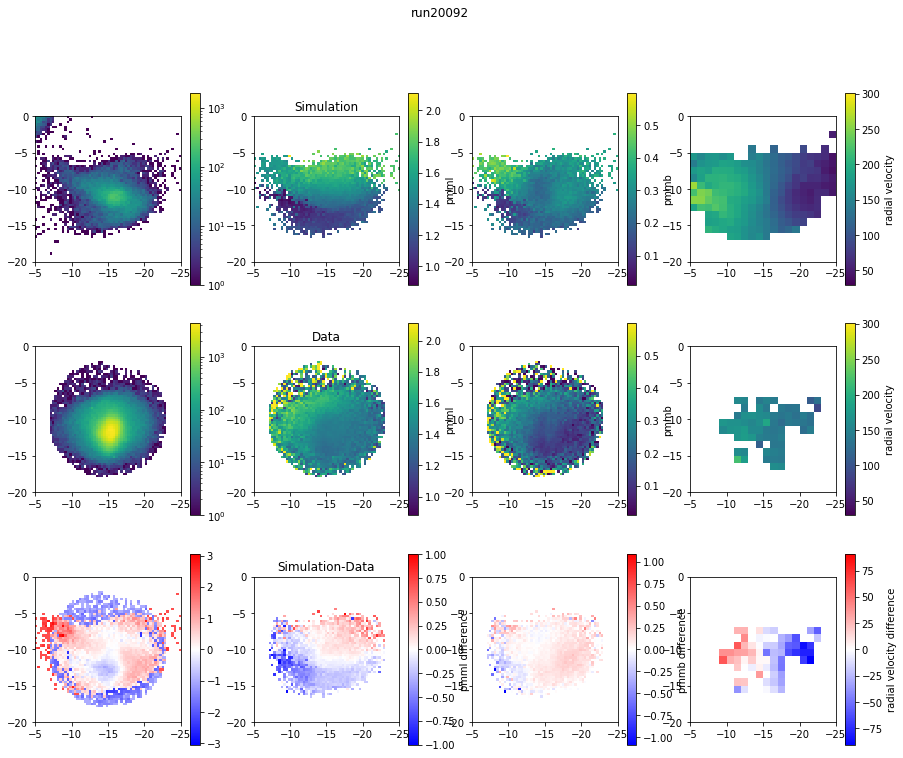

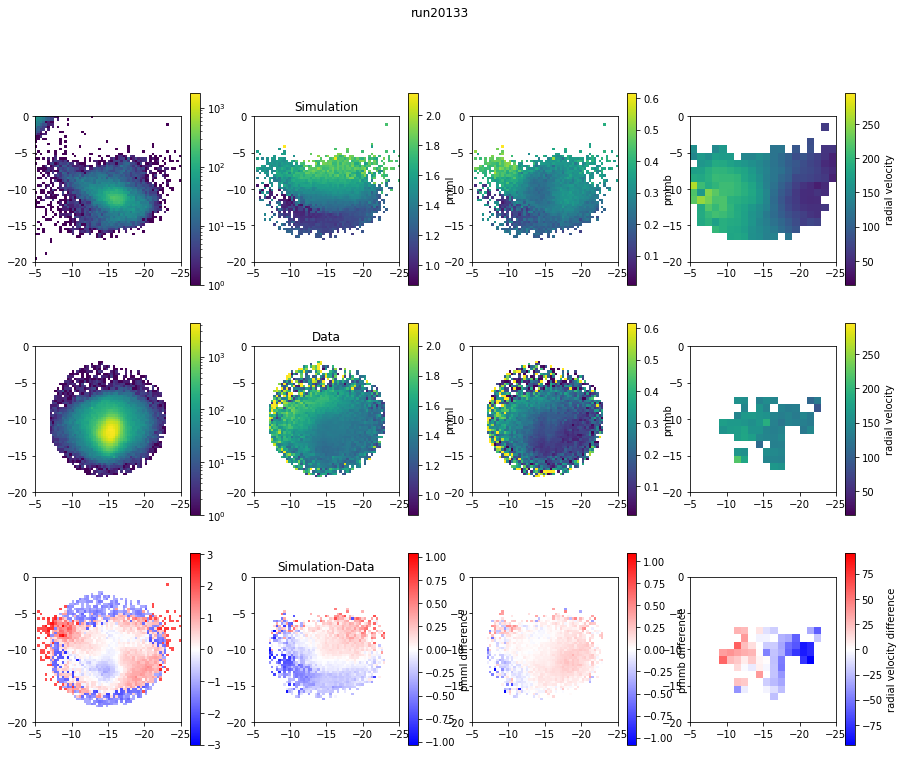

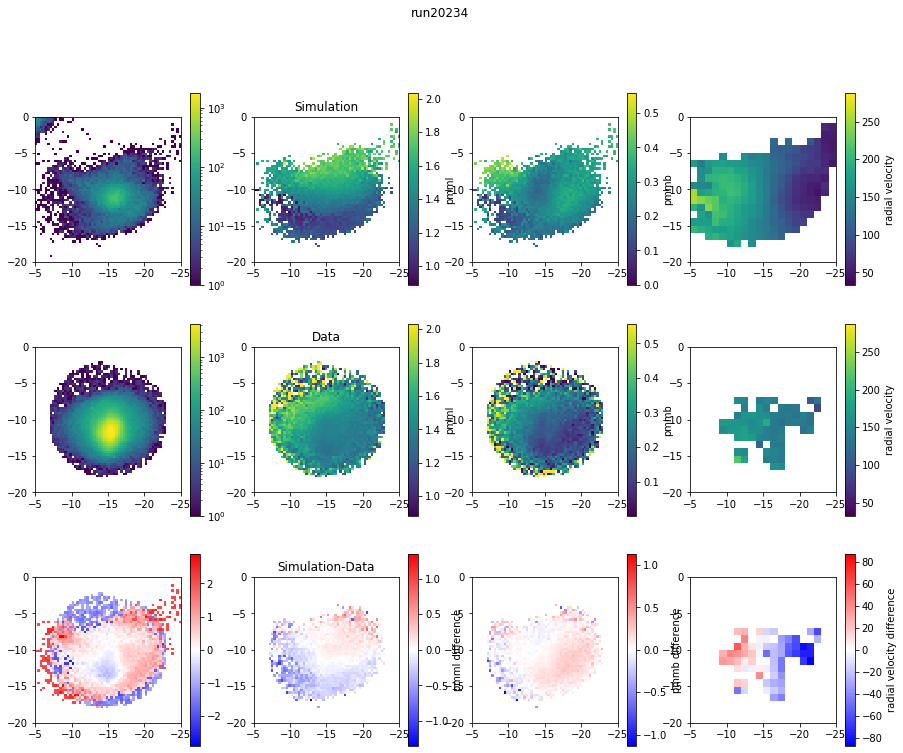

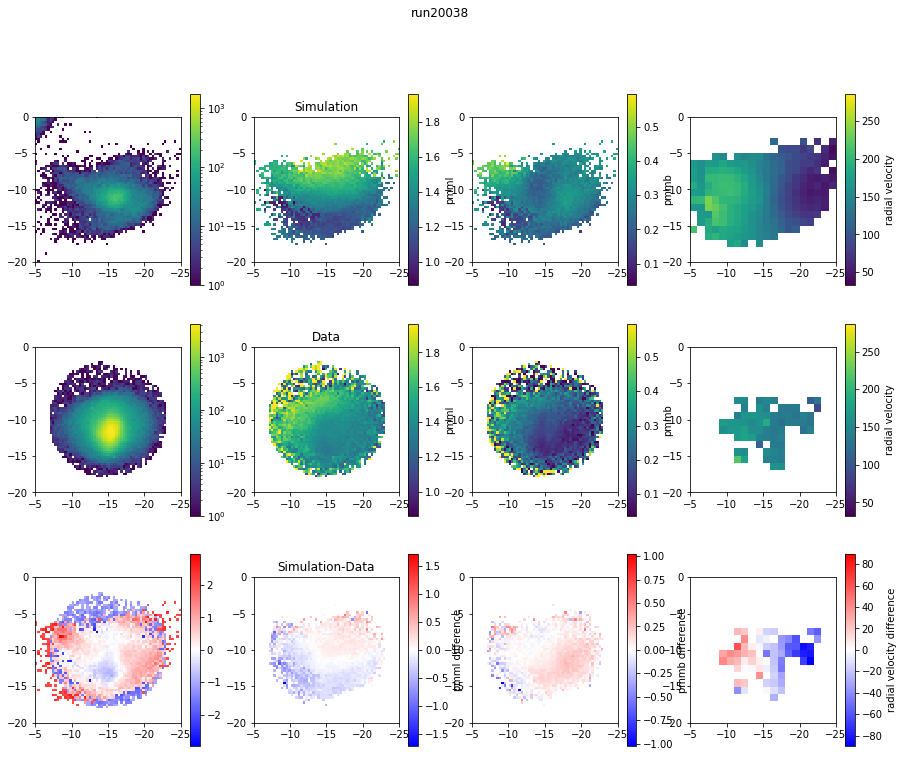

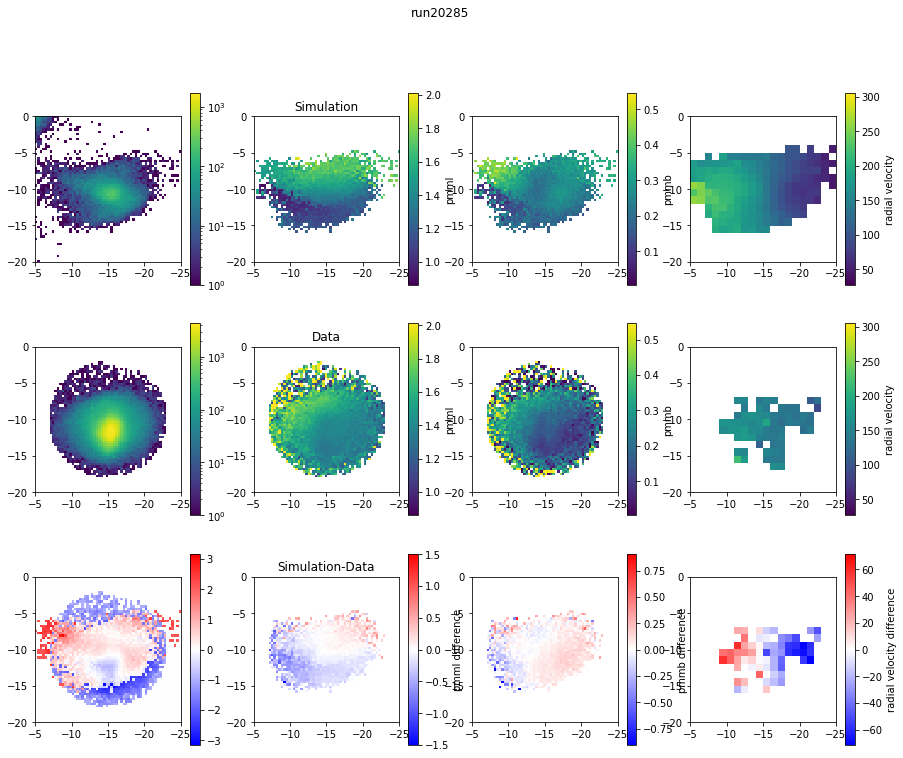

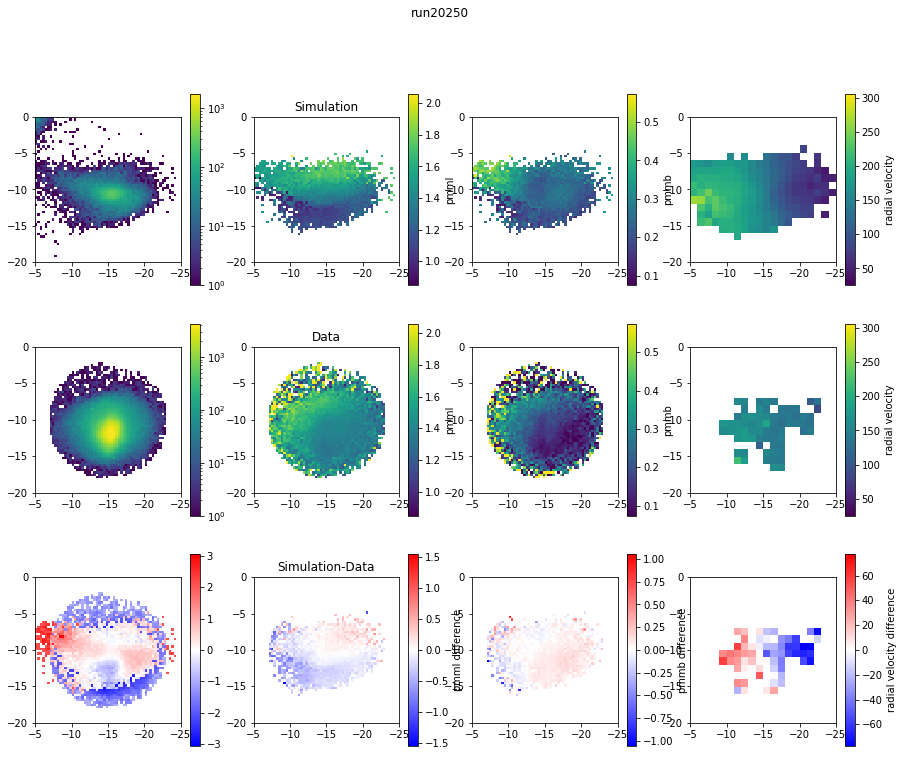

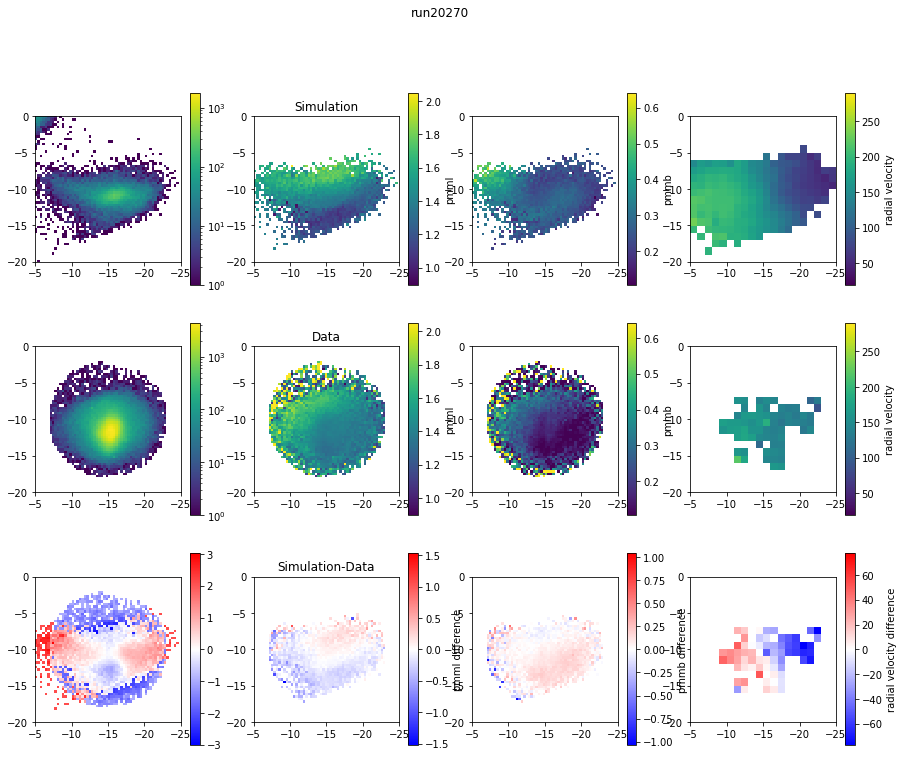

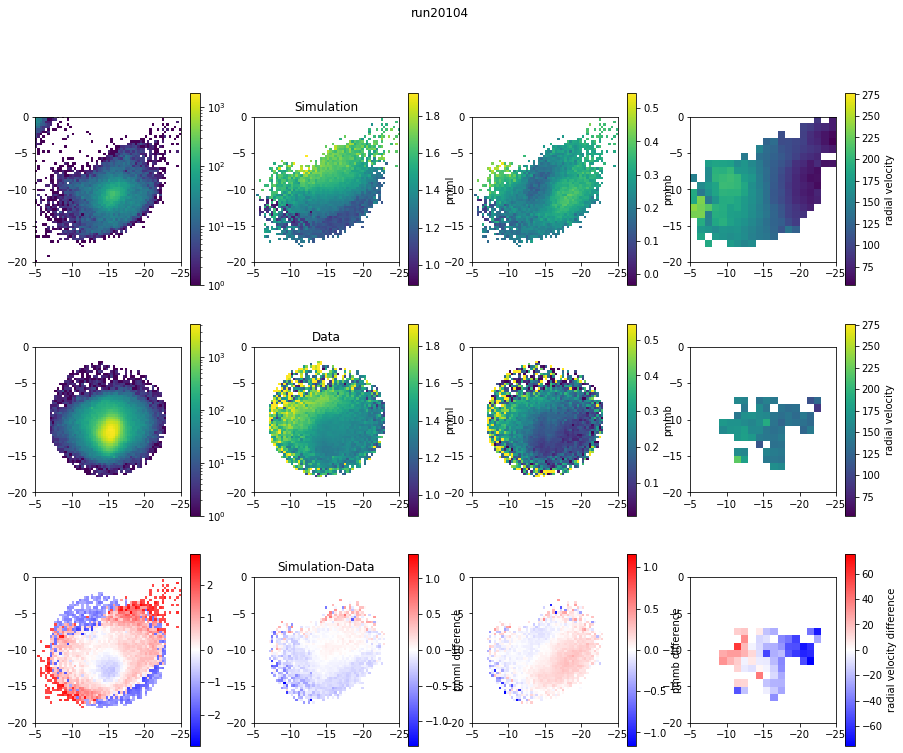

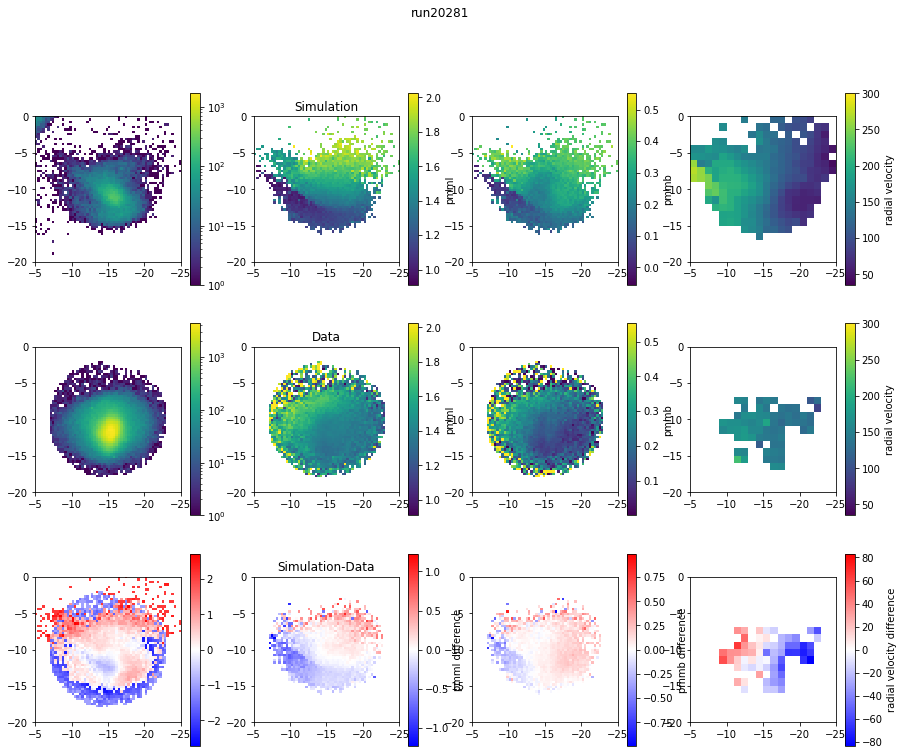

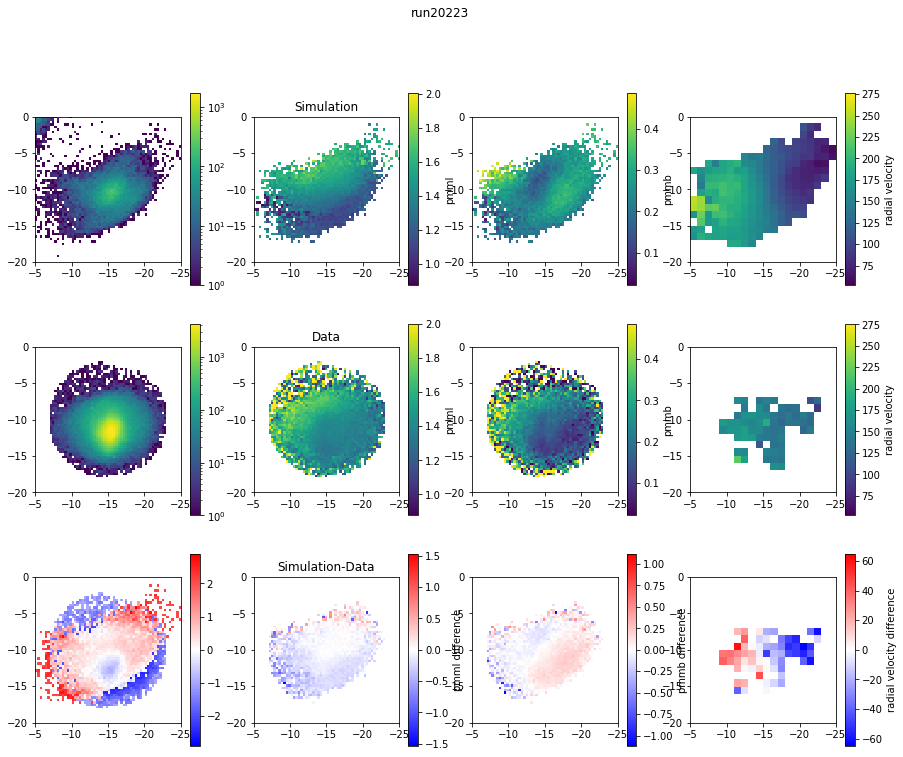

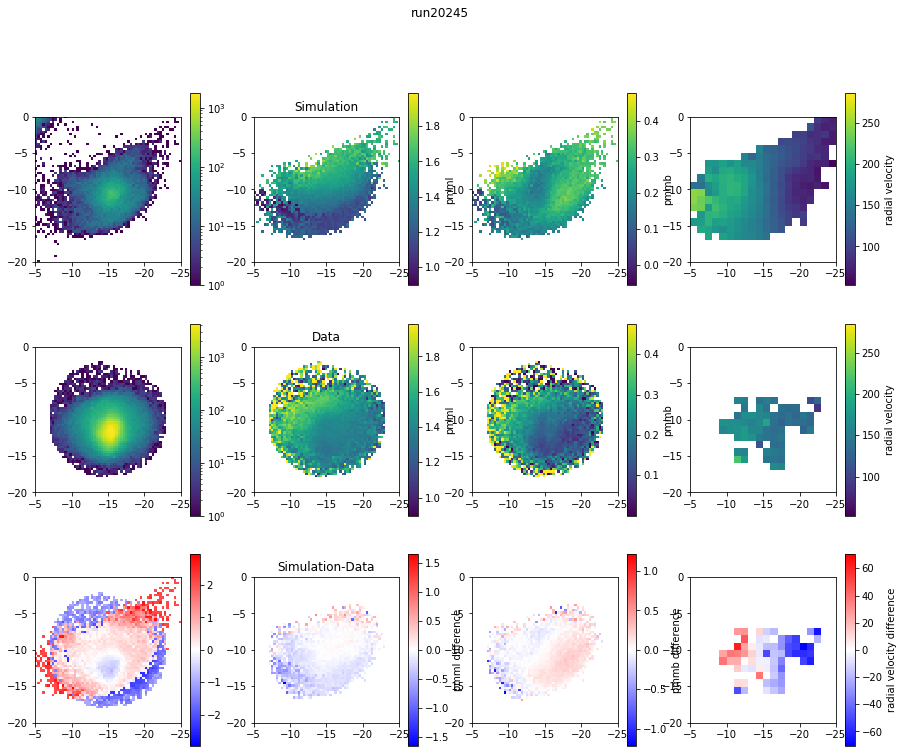

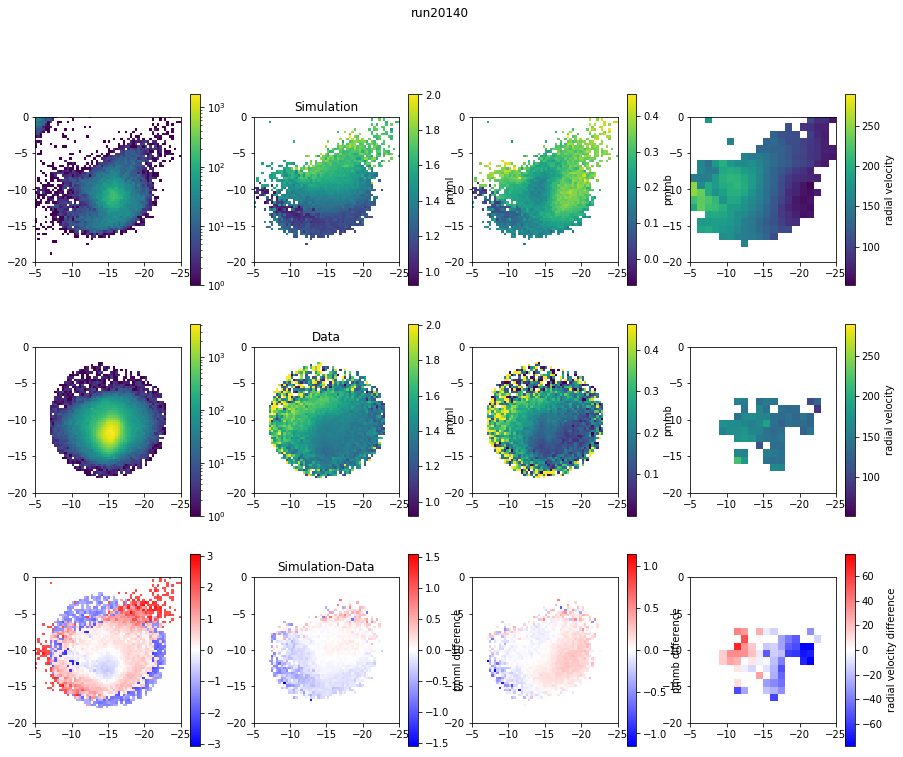

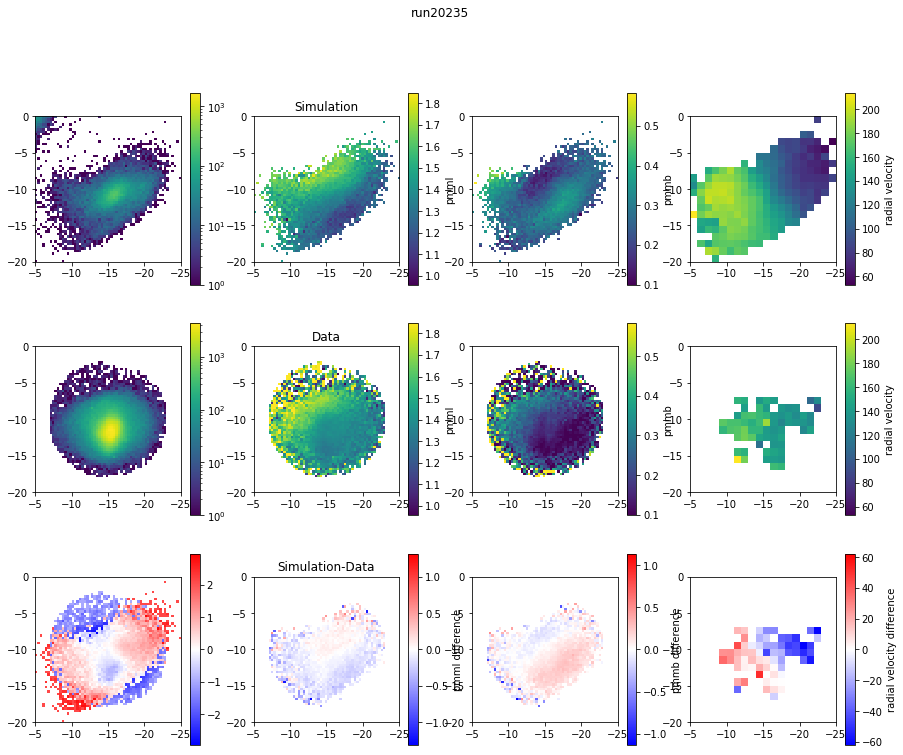

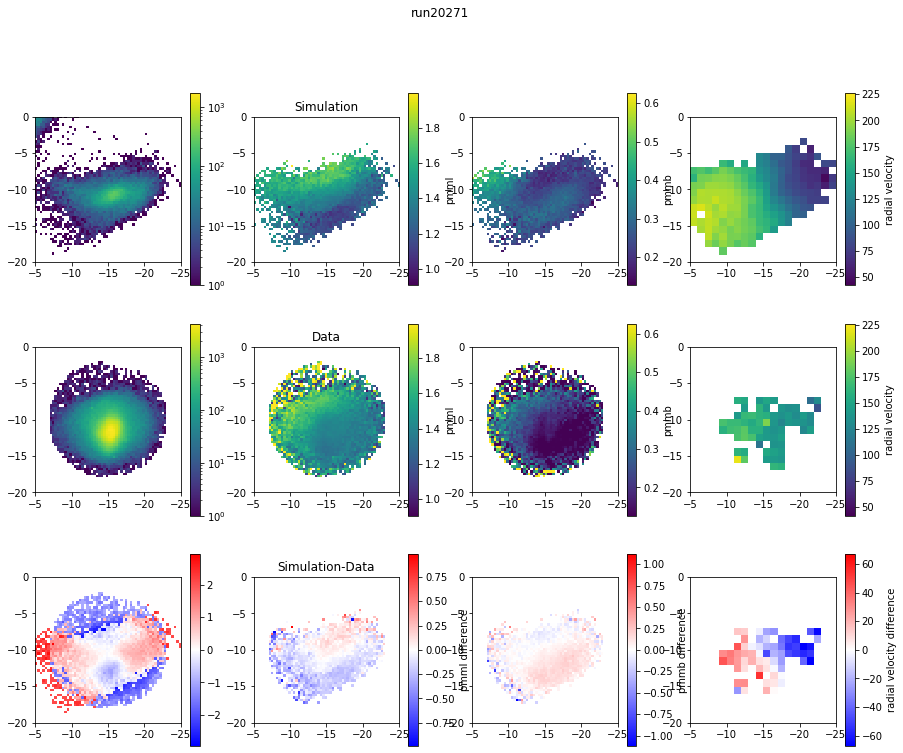

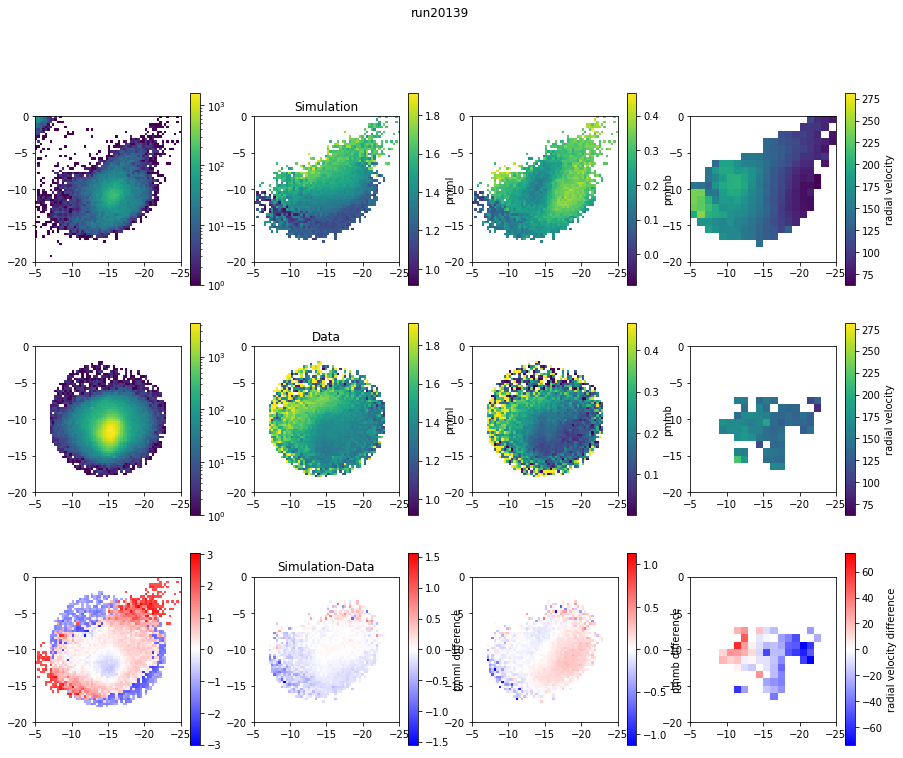

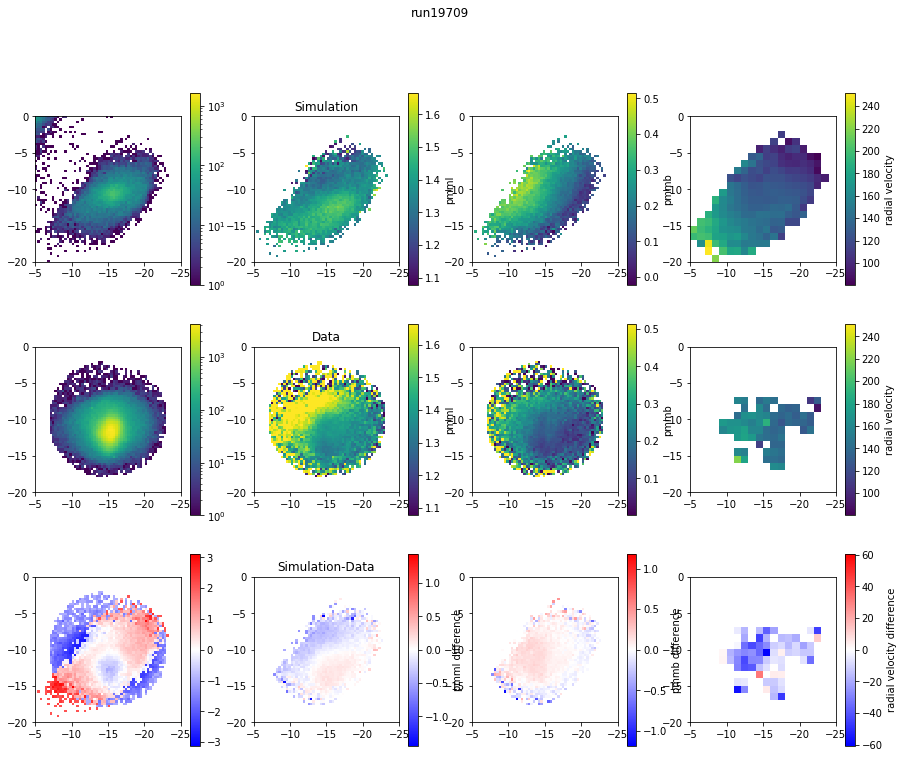

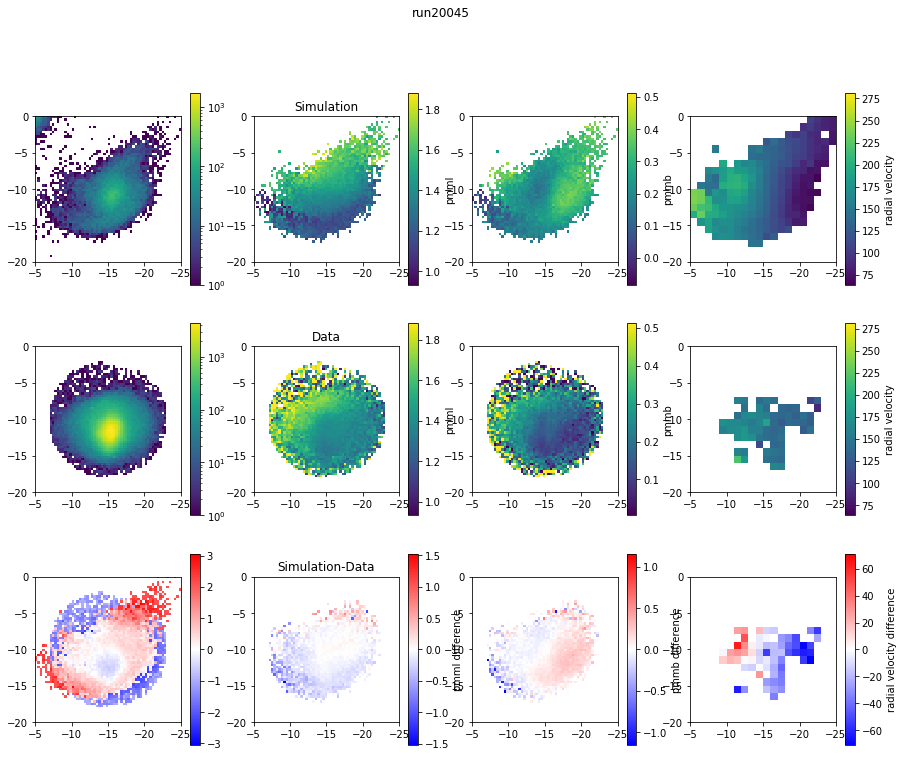

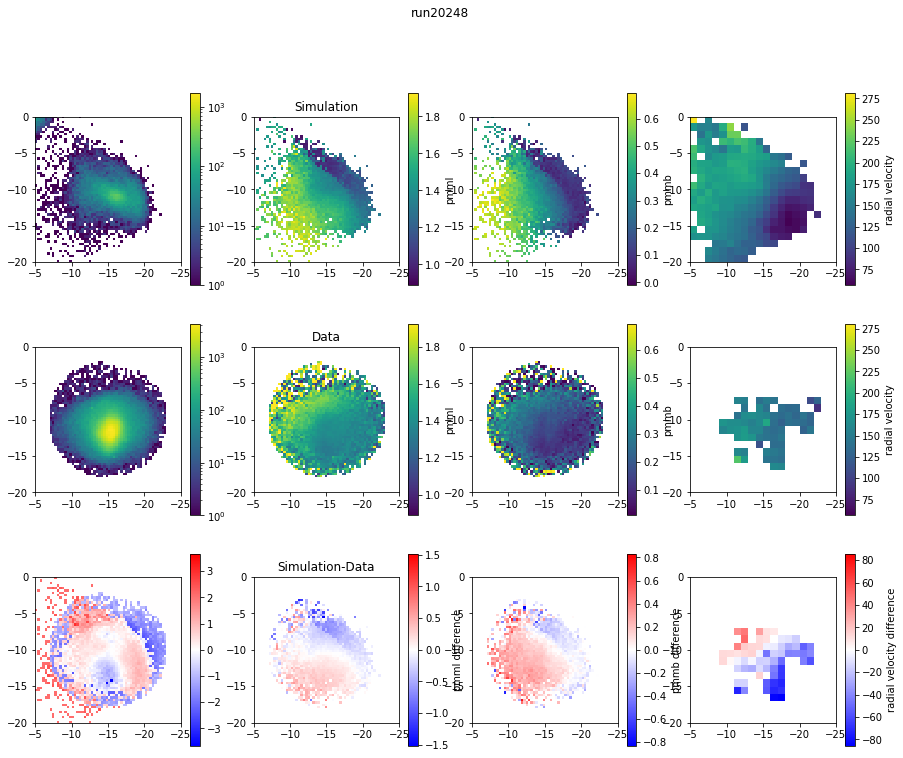

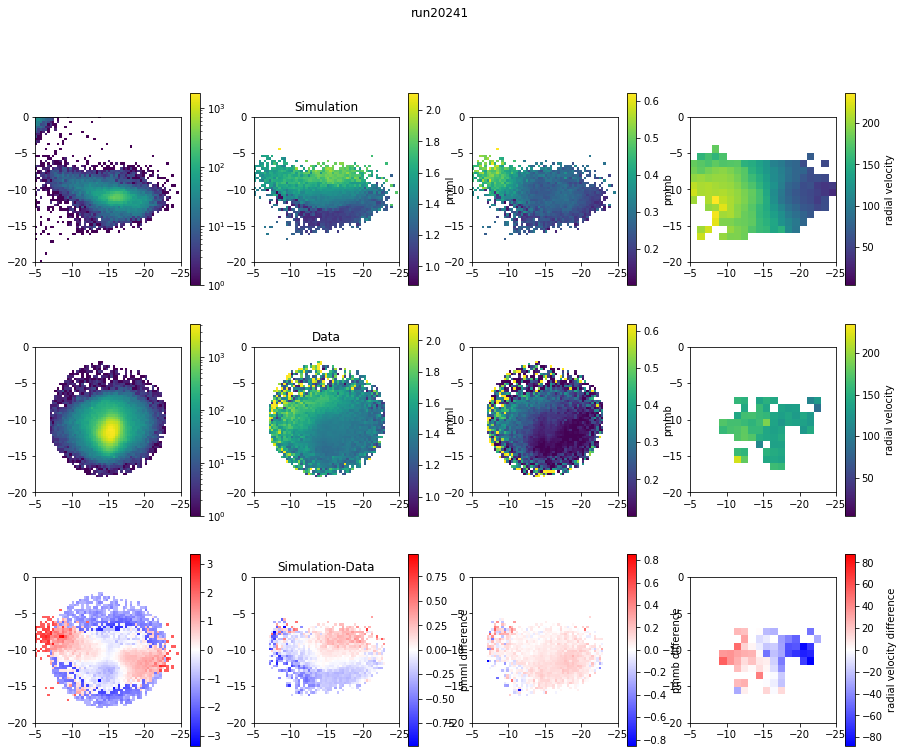

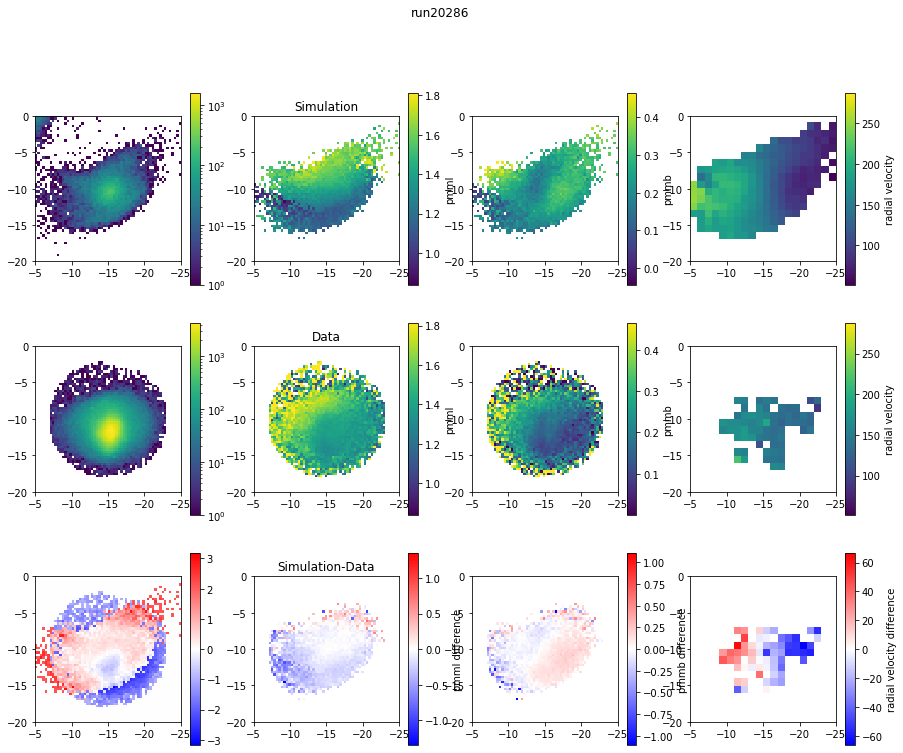

In [9]:
extent = [-30,30,-30,30]
for line in t3:
    im1 = np.load('imfiles5/run{}a.npy'.format(int(line['run'])))
    im4 = np.load('imfiles5/run{}w.npy'.format(int(line['run'])))
    plt.figure(figsize=(15,12))
    plt.subplot(3,4,1)
    plt.imshow(im1.T,origin='lower',extent=extent,norm=LN(),interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,2)
    im2 = np.load('imfiles5/run{}pmml.npy'.format(int(line['run'])))
    vminl = np.min(np.abs(im2[np.where(~np.isnan(im2))]))
    vmaxl = np.max(np.abs(im2[np.where(~np.isnan(im2))]))
    plt.imshow(im2.T,origin='lower',extent=extent,interpolation='none')
    plt.title('Simulation')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,3)
    im3 = np.load('imfiles5/run{}pmmb.npy'.format(int(line['run'])))
    vminb = np.min(np.abs(im3[np.where(~np.isnan(im3))]))
    vmaxb = np.max(np.abs(im3[np.where(~np.isnan(im3))]))
    plt.imshow(im3.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,4)
    im8 = np.load('imfiles5/run{}rv.npy'.format(int(line['run'])))
    vminrv = np.min(np.abs(im8[np.where(~np.isnan(im8))]))
    vmaxrv = np.max(np.abs(im8[np.where(~np.isnan(im8))]))
    plt.imshow(im8.T,origin='lower',extent=extent,interpolation='none')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity')
    plt.subplot(3,4,9)
    g1 = np.load('gaiamapsmc.npy')
    im5 = np.log10(im4)-np.log10(g1)
    vv1 = np.max(np.abs(im5))
    plt.imshow(im5.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv1,vmax=vv1)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,10)
    g2 = np.load('gaiapmml2.npy'.format(int(line['run'])))
    im6 = im2-g2
    vv2 = np.max(np.abs(im6[np.where(~np.isnan(im6))]))
    plt.imshow(im6.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv2,vmax=vv2)
    plt.title('Simulation-Data')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml difference')
    plt.subplot(3,4,11)
    g3 = np.load('gaiapmmb2.npy'.format(int(line['run'])))
    im7 = im3-g3
    vv3 = np.max(np.abs(im7[np.where(~np.isnan(im7))]))
    plt.imshow(im7.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb difference')
    plt.subplot(3,4,12)
    d1 = np.load('datarv.npy'.format(int(line['run'])))
    im9 = im8-d1
    vv3 = np.max(np.abs(im9[np.where(~np.isnan(im9))]))
    plt.imshow(im9.T,origin='lower',extent=extent,interpolation='none',cmap='bwr',vmin=-vv3,vmax=vv3)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity difference')
    plt.subplot(3,4,5)
    g1[(np.where(g1==0.1))] = 0
    plt.imshow(g1.T,origin='lower',extent=extent,interpolation='none',norm=LN())
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar()
    plt.subplot(3,4,6)
    plt.imshow(g2.T,origin='lower',extent=extent,interpolation='none',vmin=vminl,vmax=vmaxl)
    plt.title('Data')
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmml')
    plt.subplot(3,4,7)
    plt.imshow(g3.T,origin='lower',extent=extent,interpolation='none',vmin=vminb,vmax=vmaxb)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='pmmb')
    plt.subplot(3,4,8)
    plt.imshow(d1.T,origin='lower',extent=extent,interpolation='none',vmin=vminrv,vmax=vmaxrv)
    plt.xlim((-5,-25))
    plt.ylim((-20,0))
    plt.colorbar(label='radial velocity')
    plt.suptitle('run{}'.format(int(line['run'])))

In [8]:
t3

run,r,d,v,beta,delta,gamma,theta,phi,mass,xdist,vdist,fit,distfit,mapfit,pmmlfit,pmmbfit,rvfit
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20092.0,53.78942836772036,39.30760411596484,36.70036607186006,100.72668409104911,87.80475480531653,300.0447622513575,55.93959990638689,160.3248561743632,7.59308685260947,1.2522488237473182,19.000207352864756,0.03889353040945062,362.57600656843243,0.047893856033343334,7808.9604560438875,2267.0616317976937,1218.142274256472
20133.0,53.81041670874821,39.33306052651742,36.95886138082237,100.67076383222803,87.9052561383915,299.9818492136913,57.55791562135154,159.1505834826121,7.302803107102871,1.2732978023965205,21.667997348147274,0.03035841494718792,471.1233963729052,0.048874978082014485,7493.50404221961,2371.7698862354573,1228.2144435699531
20234.0,53.462423709128934,39.209393119876594,36.69220731880286,100.64678111107511,87.9451581190903,300.1565556977114,50.725107981176045,150.9143298592428,7.452598846474745,1.4069909731260106,21.325515237352864,0.031309328167133554,456.7572237370273,0.04925296270752974,7033.521659692107,2816.345991869677,1143.180555767331
20038.0,53.68606380195197,39.27064198308723,36.50362511671374,100.78852043148517,87.88554257319909,299.9695289502739,47.69692830139881,157.5047439829394,7.283462591700502,1.3219314495708514,22.729183880776127,0.02779151813275071,518.3633026434978,0.04963802185485845,6516.029857173044,2399.937483284362,1143.7196302296773
20285.0,53.96514832068657,39.18321922162189,36.53684868053814,101.01236763936573,87.96472690063923,300.11123902634597,53.41066517743925,163.2039017627049,8.24602154007655,1.2884039703302324,15.040975103093873,0.059624881166878654,227.89091684265244,0.052159373342939325,8832.691631225422,2115.597111352103,1100.7406598571622
20250.0,53.985329811048835,39.52132089063495,36.82293491729227,100.45316498697262,87.86997822973305,300.1469866191516,47.71601433650976,174.0822932745053,8.025960242184476,1.2791669899896285,15.933481523589256,0.054110011856482065,255.51210165083933,0.05313242252561029,7311.253972409819,1645.664172427159,1123.173818353953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20271.0,53.772091549341646,39.26460348406858,36.709233093172024,100.94994446165612,87.89756831965097,299.8025240316808,26.459174125223342,192.37008293334148,8.174356561340502,1.417710490919142,18.18373574134221,0.04287186515944594,332.65814854702836,0.05566681375517524,4497.954737474936,2168.8004419552694,832.7369005193707
20139.0,53.617378997211155,39.16108426663309,36.92177686202071,100.6101179307454,87.90954488633716,299.979938272209,52.67156834452509,129.67255057417756,7.540127766308094,1.0896483045444596,18.83257081148256,0.03984662267612661,355.8530567971016,0.055684320151609144,6022.1814013096655,3543.8150354188365,875.711185934295
